# Introduction

## Importing packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from pylab import rcParams
import datetime as dt
import os

%matplotlib inline
rcParams['figure.figsize'] = 25, 15
os.getcwd()

'/home/jovyan/work/Projects/porttalbot/codes'

## Importing files

In [4]:
df = pd.read_csv(r'/home/jovyan/work/Projects/porttalbot/spreadsheets/datafile_new.csv')
df.fillna(value=0, inplace=True)
df['JobDate'] = pd.to_datetime(df['JobDate']).dt.date
display(df.head(5))

JobID1       JobID2         CleanJobTitle  \
0  784397514  784397514.0  Supply Chain Manager   
1  784397514  784397514.0  Supply Chain Manager   
2  784397514  784397514.0  Supply Chain Manager   
3  784397514  784397514.0  Supply Chain Manager   
4  784397514  784397514.0  Supply Chain Manager   

                                             JobText  \
0  Supply Chain Manager  Recruiter     Hunter Sel...   
1  Supply Chain Manager  Recruiter     Hunter Sel...   
2  Supply Chain Manager  Recruiter     Hunter Sel...   
3  Supply Chain Manager  Recruiter     Hunter Sel...   
4  Supply Chain Manager  Recruiter     Hunter Sel...   

                      CanonSkillName CanonCity CanonCounty     TTWA  \
0                         Accounting   Swansea     Swansea  Swansea   
1                          Budgeting   Swansea     Swansea  Swansea   
2                         Creativity   Swansea     Swansea  Swansea   
3  Key Performance Indicators (KPIs)   Swansea     Swansea  Swansea   
4                          Logistics   Swansea     Swansea  Swansea   

   MinAnnualSalary  MaxAnnualSalary  MinExperience  MaxExperience     JobDate  
0          45000.0          55000.0            0.0            0.0  2019-12-31  
1          45000.0          55000.0            0.0            0.0  2019-12-31  
2          45000.0          55000.0            0.0            0.0  2019-12-31  
3          45000.0          55000.0            0.0            0.0  2019-12-31  
4          45000.0          55000.0            0.0            0.0  2019-12-31

In [5]:
UK = pd.read_csv(r'/home/jovyan/work/Projects/porttalbot/spreadsheets/UK_Skills.csv')
UK.dropna(inplace=True)
UK.columns = ['year', 'skills', 'count']
UK.set_index('year', inplace=True)
display(UK.head(5))

skills  count
year                                     
2019          3D Conceptual Design      2
2019                 3D Studio Max    457
2019  4PL (Fourth Party Logistics)     67
2019                 4th Dimension      8
2014             5-Axis CNC Router      9

## Swansea TTWA

### Top 20 skills in 2019

In [6]:
Swansea_TTWA = df[df['TTWA'] == 'Swansea']
display(Swansea_TTWA.head(5))

JobID1       JobID2         CleanJobTitle  \
0  784397514  784397514.0  Supply Chain Manager   
1  784397514  784397514.0  Supply Chain Manager   
2  784397514  784397514.0  Supply Chain Manager   
3  784397514  784397514.0  Supply Chain Manager   
4  784397514  784397514.0  Supply Chain Manager   

                                             JobText  \
0  Supply Chain Manager  Recruiter     Hunter Sel...   
1  Supply Chain Manager  Recruiter     Hunter Sel...   
2  Supply Chain Manager  Recruiter     Hunter Sel...   
3  Supply Chain Manager  Recruiter     Hunter Sel...   
4  Supply Chain Manager  Recruiter     Hunter Sel...   

                      CanonSkillName CanonCity CanonCounty     TTWA  \
0                         Accounting   Swansea     Swansea  Swansea   
1                          Budgeting   Swansea     Swansea  Swansea   
2                         Creativity   Swansea     Swansea  Swansea   
3  Key Performance Indicators (KPIs)   Swansea     Swansea  Swansea   
4                          Logistics   Swansea     Swansea  Swansea   

   MinAnnualSalary  MaxAnnualSalary  MinExperience  MaxExperience     JobDate  
0          45000.0          55000.0            0.0            0.0  2019-12-31  
1          45000.0          55000.0            0.0            0.0  2019-12-31  
2          45000.0          55000.0            0.0            0.0  2019-12-31  
3          45000.0          55000.0            0.0            0.0  2019-12-31  
4          45000.0          55000.0            0.0            0.0  2019-12-31

In [7]:
Swansea_TTWA_2014 = Swansea_TTWA[pd.DatetimeIndex(Swansea_TTWA['JobDate']).year == 2014]
Swansea_TTWA_piv_2014 = pd.pivot_table(data=Swansea_TTWA_2014, values='JobID1', index='CanonSkillName', aggfunc=lambda x: len(x.unique()))
Swansea_TTWA_piv_2014 = Swansea_TTWA_piv_2014[Swansea_TTWA_piv_2014.index != 0]

Swansea_TTWA_2019 = Swansea_TTWA[pd.DatetimeIndex(Swansea_TTWA['JobDate']).year == 2019]
Swansea_TTWA_piv_2019 = pd.pivot_table(data=Swansea_TTWA_2019, values='JobID1', index='CanonSkillName', aggfunc=lambda x: len(x.unique()))
Swansea_TTWA_piv_2019 = Swansea_TTWA_piv_2019[Swansea_TTWA_piv_2019.index != 0]

Swansea_TTWA_piv_2019.columns = ['count']
Swansea_TTWA_piv_2019['share_in_percent'] = (np.round(Swansea_TTWA_piv_2019['count']/np.sum(Swansea_TTWA_piv_2019['count']), 4)*100)
display(Swansea_TTWA_piv_2019.head(5))

count  share_in_percent
CanonSkillName                                                    
.NET                                         118              0.15
3D Animation                                   6              0.01
3D Modelling / Design                         10              0.01
3D Printing / Additive Manufacturing (AM)     16              0.02
3PL (Third Party Logistics)                    2              0.00

Text(0.5, 1.0, 'Top 20 skills by share (%): 2019')

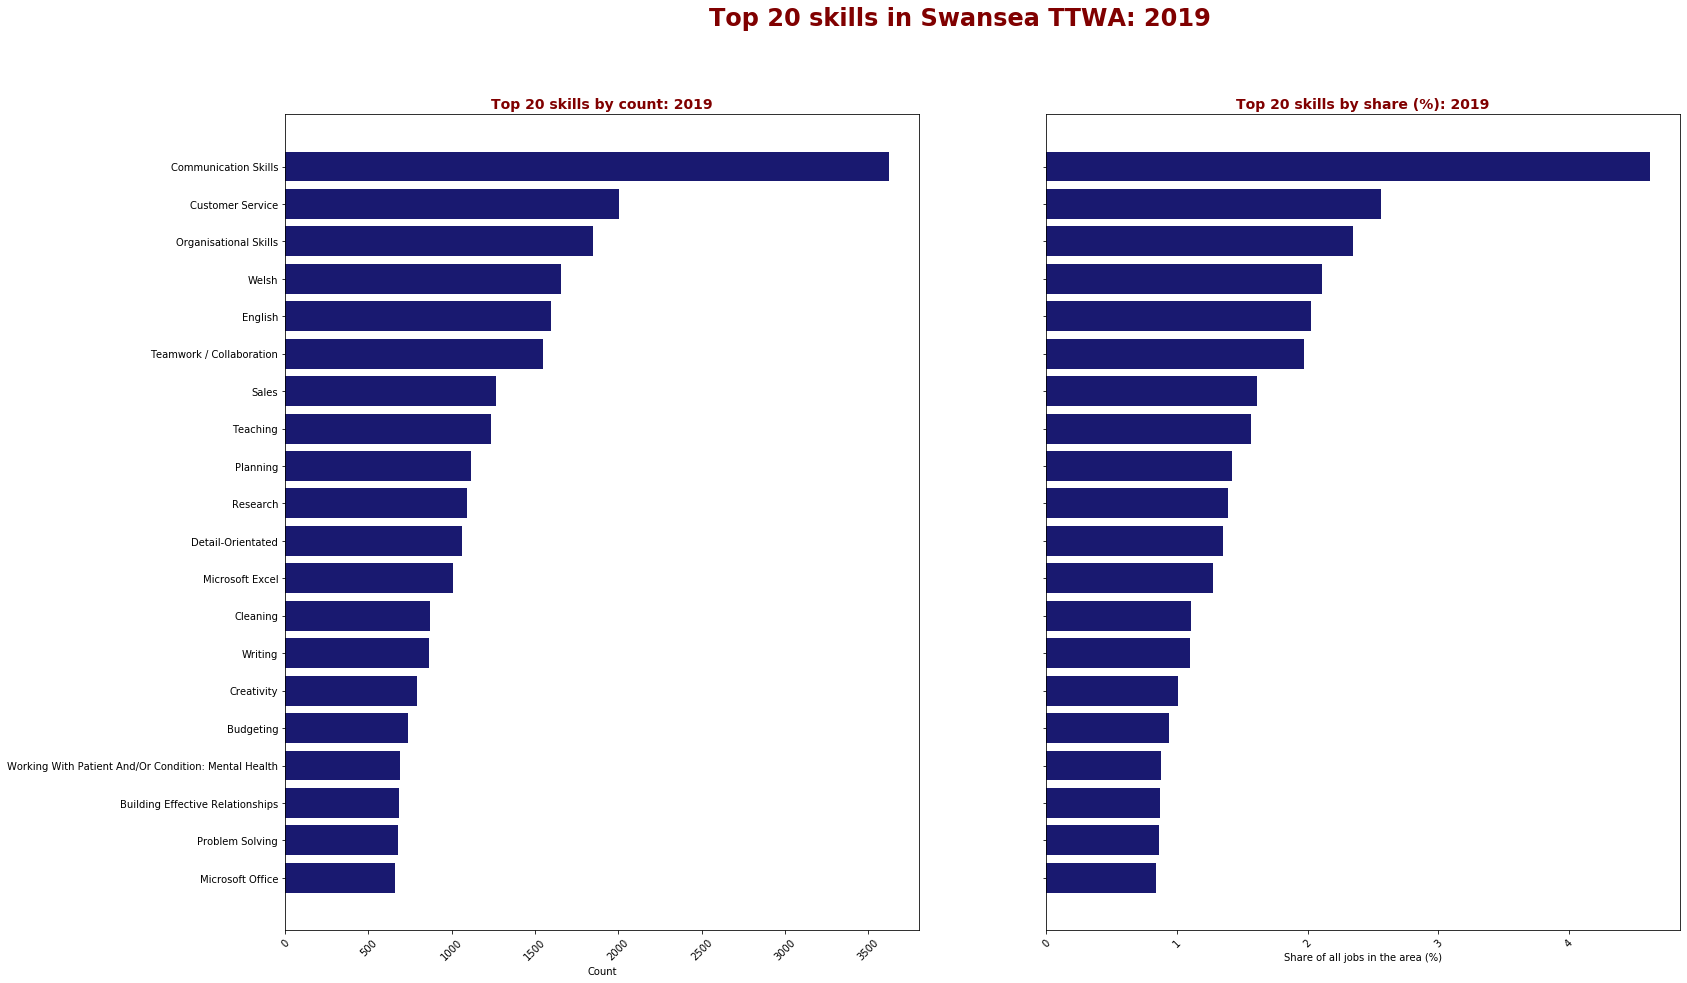

In [8]:
Swansea_Top_20_2019_by_count = Swansea_TTWA_piv_2019.nlargest(20, 'count').sort_values(by='count', axis=0, ascending=True)
Swansea_Top_20_2019_by_share = Swansea_TTWA_piv_2019.nlargest(20, 'share_in_percent').sort_values(by='share_in_percent', axis=0, ascending=True)

fig , (ax1, ax2) = plt.subplots(1, 2, sharey=True)
plt.suptitle('Top 20 skills in Swansea TTWA: 2019', fontsize = 24, fontweight='bold', color='maroon')

ax1.barh(Swansea_Top_20_2019_by_count.index, Swansea_Top_20_2019_by_count['count'], color='midnightblue')
ax1.set_xlabel('Count')
plt.setp(ax1.get_xticklabels(), rotation=45)
ax1.set_title('Top 20 skills by count: 2019', fontsize=14, fontweight='bold', color='maroon')

ax2.barh(Swansea_Top_20_2019_by_share.index, Swansea_Top_20_2019_by_share['share_in_percent'], color='midnightblue')
ax2.set_xlabel('Share of all jobs in the area (%)')
plt.setp(ax2.get_xticklabels(), rotation=45)
ax2.set_title('Top 20 skills by share (%): 2019', fontsize=14, fontweight='bold', color='maroon')

### Top 20 skills' change in demand in Swansea TTWA

In [9]:
Swansea_TTWA_combined = pd.concat([Swansea_TTWA_piv_2014, Swansea_TTWA_piv_2019['count']], axis=1)
Swansea_TTWA_combined.columns = ['Jobs2014', 'Jobs2019']
Swansea_TTWA_combined['PercentChange'] = np.round(((Swansea_TTWA_combined['Jobs2019']-Swansea_TTWA_combined['Jobs2014'])/Swansea_TTWA_combined['Jobs2014'])*100, 4)
Swansea_TTWA_combined.dropna(subset=['PercentChange'], inplace=True)
Swansea_TTWA_combined.sort_values(by='PercentChange', inplace=True, ascending=False)
display(Swansea_TTWA_combined)

Jobs2014  Jobs2019  \
Machine Learning                                       1.0      46.0   
Bartending                                             2.0      63.0   
Alzheimer's Disease Knowledge                          1.0      28.0   
Wound Management                                       1.0      25.0   
PipeFitting                                            1.0      22.0   
...                                                    ...       ...   
Scala                                                 51.0       3.0   
Microsoft Sql Server Integration Services (SSIS)      23.0       1.0   
National Offender Management Service                  27.0       1.0   
Standard Costing                                      27.0       1.0   
Babysitting                                           28.0       1.0   

                                                  PercentChange  
Machine Learning                                      4500.0000  
Bartending                                            3050.0000  
Alzheimer's Disease Knowledge                         2700.0000  
Wound Management                                      2400.0000  
PipeFitting                                           2100.0000  
...                                                         ...  
Scala                                                  -94.1176  
Microsoft Sql Server Integration Services (SSIS)       -95.6522  
National Offender Management Service                   -96.2963  
Standard Costing                                       -96.2963  
Babysitting                                            -96.4286  

[1867 rows x 3 columns]

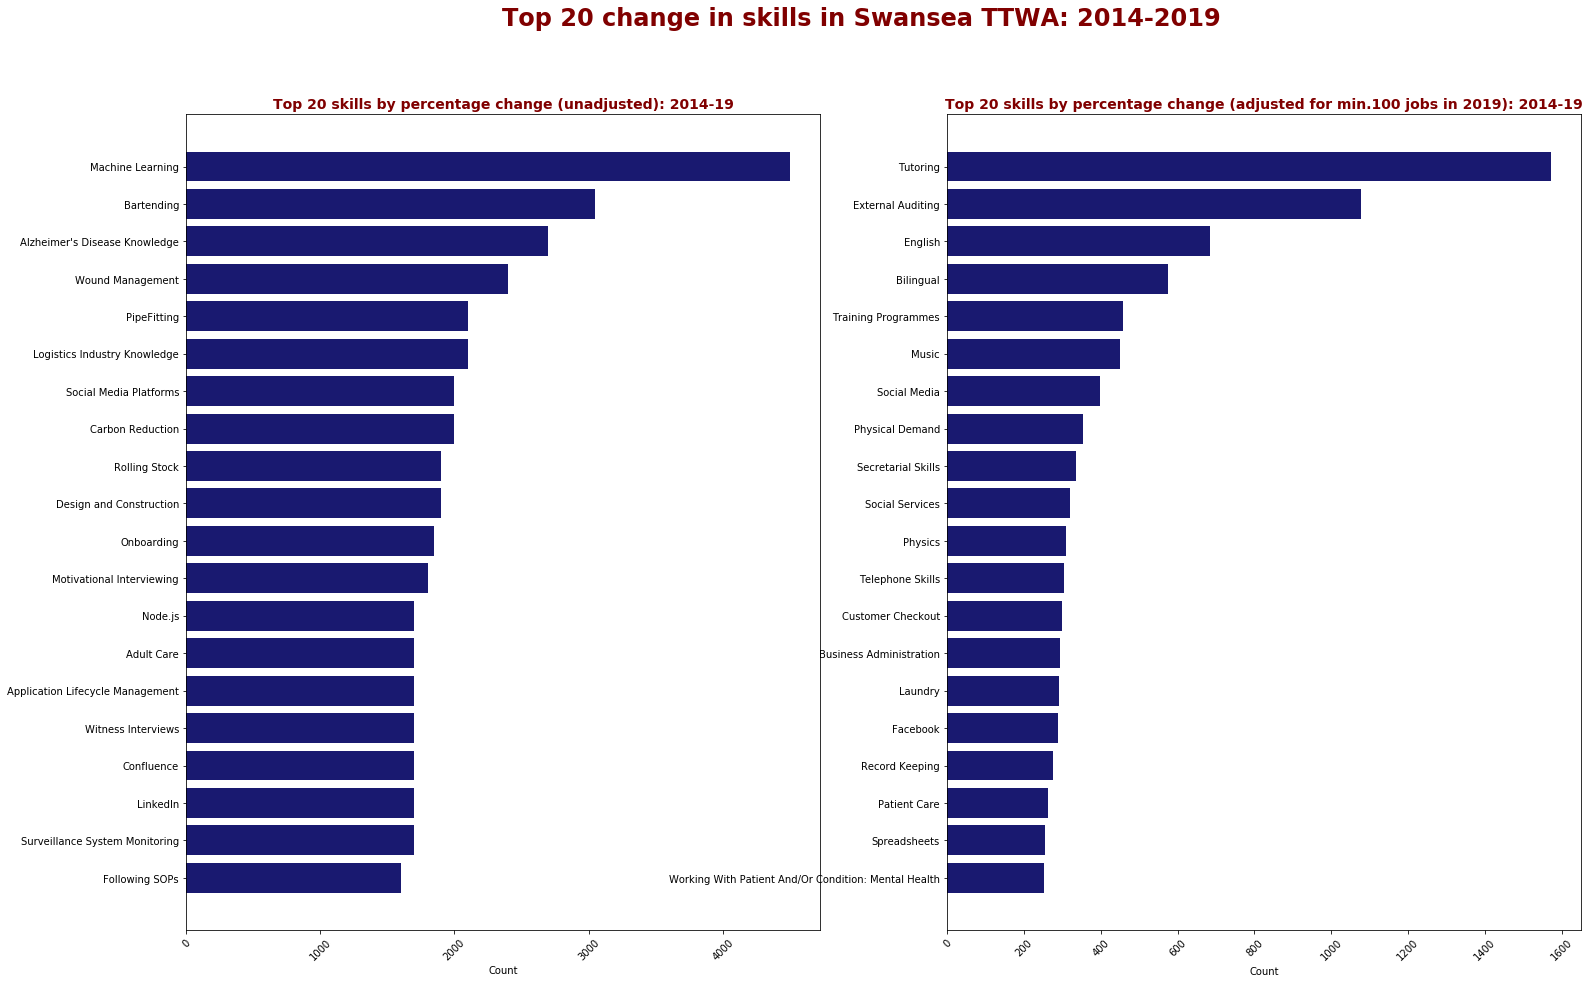

In [10]:
Swansea_Top_20_unadjusted_change_2019 = Swansea_TTWA_combined.nlargest(20, 'PercentChange').sort_values(by='PercentChange', axis=0, ascending=True)
Swansea_Top_20_adjusted_change_2019 = Swansea_TTWA_combined[Swansea_TTWA_combined['Jobs2019']>=100.00].nlargest(20, 'PercentChange').sort_values(by='PercentChange', axis=0, ascending=True)

fig , (ax1, ax2) = plt.subplots(1, 2, sharey=False)
plt.suptitle('Top 20 change in skills in Swansea TTWA: 2014-2019', fontsize = 24, fontweight='bold', color='maroon')

ax1.barh(Swansea_Top_20_unadjusted_change_2019.index, Swansea_Top_20_unadjusted_change_2019['PercentChange'], color='midnightblue')
plt.setp(ax1.get_xticklabels(), rotation=45)
ax1.set_xlabel('Count')
ax1.set_title('Top 20 skills by percentage change (unadjusted): 2014-19', fontsize=14, fontweight='bold', color='maroon')

ax2.barh(Swansea_Top_20_adjusted_change_2019.index, Swansea_Top_20_adjusted_change_2019['PercentChange'], color='midnightblue')
plt.setp(ax2.get_xticklabels(), rotation=45)
ax2.set_xlabel('Count')
ax2.set_title('Top 20 skills by percentage change (adjusted for min.100 jobs in 2019): 2014-19', fontsize=14, fontweight='bold', color='maroon')

plt.show()

## United Kingdom

### Top 20 skills in the UK in 2019

In [11]:
UK_2014 = UK[UK.index==2014]
UK_2019 = UK[UK.index==2019]

UK_2019['share_in_percent'] = (np.round(UK_2019['count']/np.sum(UK_2019['count']), 4)*100)
display(UK_2019.head(5))

<ipython-input-11-db477eba7381>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UK_2019['share_in_percent'] = (np.round(UK_2019['count']/np.sum(UK_2019['count']), 4)*100)


skills  count  share_in_percent
year                                                       
2019          3D Conceptual Design      2               0.0
2019                 3D Studio Max    457               0.0
2019  4PL (Fourth Party Logistics)     67               0.0
2019                 4th Dimension      8               0.0
2019     Abdominal Aortic Aneurysm     43               0.0

Text(0.5, 1.0, 'Top 20 skills by share (%): 2019')

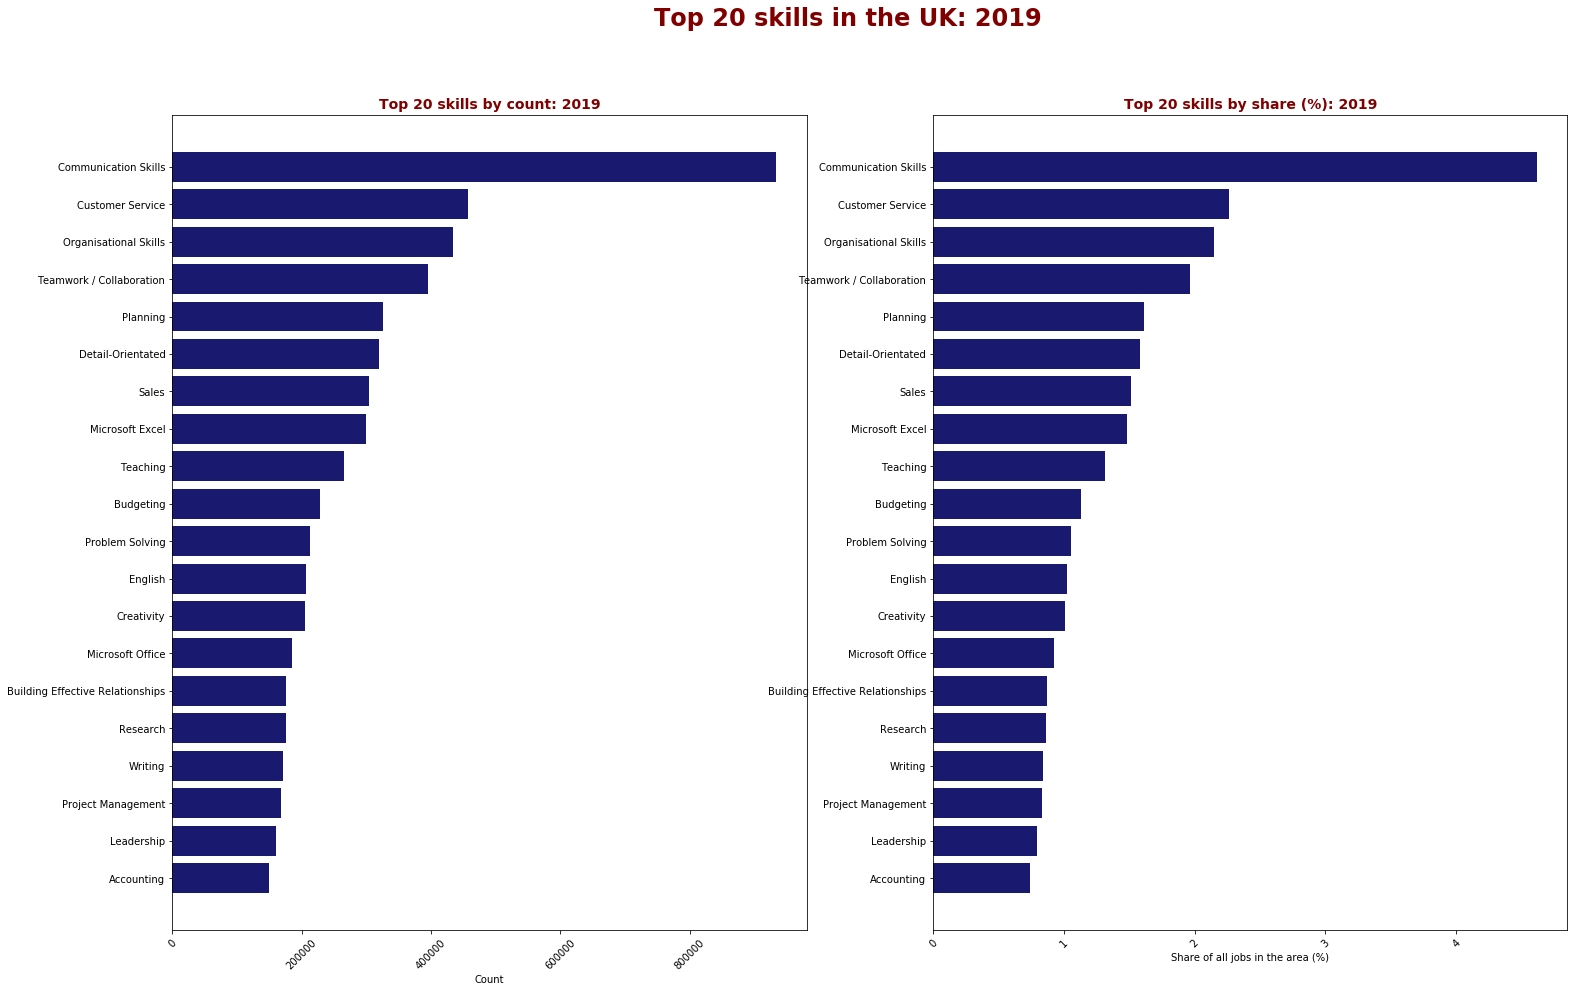

In [14]:
UK_Top_20_2019_by_count = UK_2019.nlargest(20, 'count').sort_values(by='count', axis=0, ascending=True)
UK_Top_20_2019_by_share = UK_2019.nlargest(20, 'share_in_percent').sort_values(by='share_in_percent', axis=0, ascending=True)

fig , (ax1, ax2) = plt.subplots(1, 2, sharey=False)
plt.suptitle('Top 20 skills in the UK: 2019', fontsize = 24, fontweight='bold', color='maroon')

ax1.barh(UK_Top_20_2019_by_count['skills'], UK_Top_20_2019_by_count['count'], color='midnightblue')
ax1.set_xlabel('Count')
plt.setp(ax1.get_xticklabels(), rotation=45)
ax1.set_title('Top 20 skills by count: 2019', fontsize=14, fontweight='bold', color='maroon')

ax2.barh(UK_Top_20_2019_by_share['skills'], UK_Top_20_2019_by_share['share_in_percent'], color='midnightblue')
ax2.set_xlabel('Share of all jobs in the area (%)')
plt.setp(ax2.get_xticklabels(), rotation=45)
ax2.set_title('Top 20 skills by share (%): 2019', fontsize=14, fontweight='bold', color='maroon')

### Top 20 skills' change in demand in the UK

In [15]:
UK_combined = pd.merge(UK_2014, UK_2019, on='skills', how='inner')
UK_combined.drop(columns=['share_in_percent'], inplace=True)
UK_combined.columns = ['skills', 'Jobs2014', 'Jobs2019']
UK_combined['PercentChange'] = np.round(((UK_combined['Jobs2019']-UK_combined['Jobs2014'])/UK_combined['Jobs2014'])*100, 2)
UK_combined.dropna(subset=['PercentChange'], inplace=True)
UK_combined.sort_values(by='PercentChange', inplace=True, ascending=False)
display(UK_combined.head())

skills  Jobs2014  Jobs2019  PercentChange
1167                   Blockchain         1       685       68400.00
8180                 Thrombectomy         2       525       26150.00
2385      Data Lakes / Reservoirs         5      1271       25320.00
2402                Deep Learning        11      1593       14381.82
765   Bank Experience Enhancement         2       267       13250.00

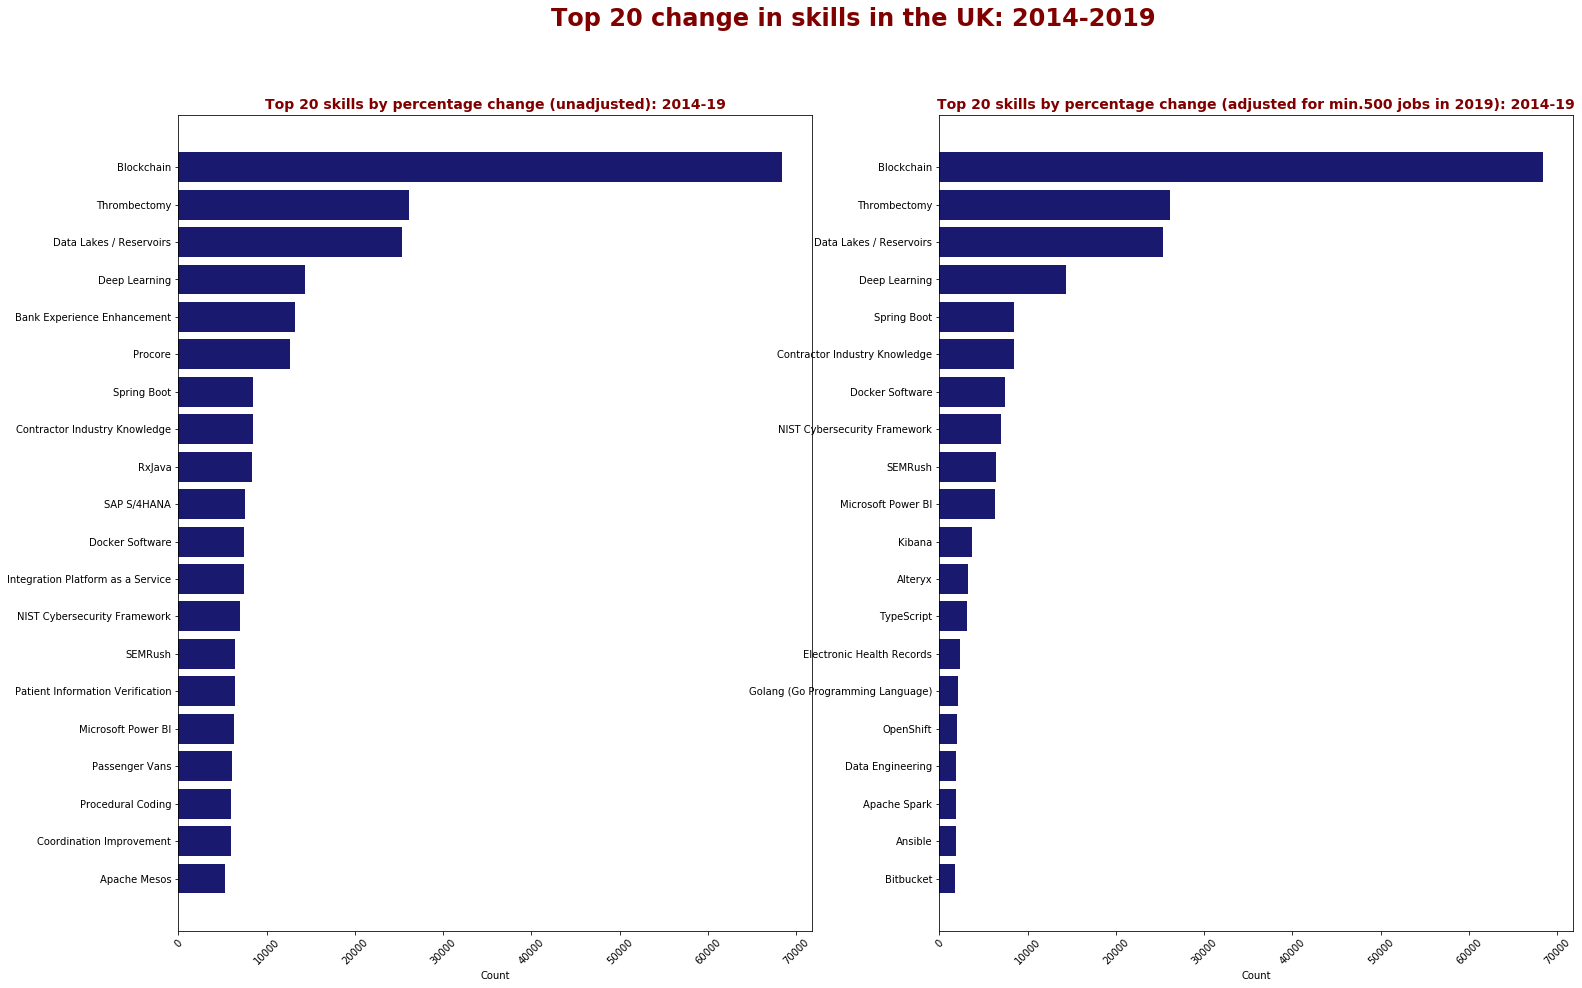

In [16]:
UK_Top_20_unadjusted_change_2019 = UK_combined.nlargest(20, 'PercentChange').sort_values(by='PercentChange', axis=0, ascending=True)
UK_Top_20_adjusted_change_2019 = UK_combined[UK_combined['Jobs2019']>=500.00].nlargest(20, 'PercentChange').sort_values(by='PercentChange', axis=0, ascending=True)

fig , (ax1, ax2) = plt.subplots(1, 2, sharey=False)
plt.suptitle('Top 20 change in skills in the UK: 2014-2019', fontsize = 24, fontweight='bold', color='maroon')

ax1.barh(UK_Top_20_unadjusted_change_2019['skills'], UK_Top_20_unadjusted_change_2019['PercentChange'], color='midnightblue')
plt.setp(ax1.get_xticklabels(), rotation=45)
ax1.set_xlabel('Count')
ax1.set_title('Top 20 skills by percentage change (unadjusted): 2014-19', fontsize=14, fontweight='bold', color='maroon')

ax2.barh(UK_Top_20_adjusted_change_2019['skills'], UK_Top_20_adjusted_change_2019['PercentChange'], color='midnightblue')
plt.setp(ax2.get_xticklabels(), rotation=45)
ax2.set_xlabel('Count')
ax2.set_title('Top 20 skills by percentage change (adjusted for min.500 jobs in 2019): 2014-19', fontsize=14, fontweight='bold', color='maroon')

plt.show()

## Comparison between Swansea TTWA and United Kingdom

### Comparison of the UK with Swansea TTWA

In [17]:
UK_combined.set_index('skills', inplace=True)
display(UK_combined)

Jobs2014  Jobs2019  PercentChange
skills                                                        
Blockchain                          1       685       68400.00
Thrombectomy                        2       525       26150.00
Data Lakes / Reservoirs             5      1271       25320.00
Deep Learning                      11      1593       14381.82
Bank Experience Enhancement         2       267       13250.00
...                               ...       ...            ...
Internet Development               41         1         -97.56
EMC UniSphere                      51         1         -98.04
Aleve                              61         1         -98.36
WinRunner                         139         2         -98.56
MooTools                          220         1         -99.55

[9790 rows x 3 columns]

In [18]:
Swansea_skills_unadjusted = ['Following SOPs', 'Surveillance System Monitoring', 'LinkedIn', 'Confluence', 'Witness Interviews', 'Application Lifecycle Management', 'Adult Care', 'Node.js',
                             'Motivational Interviewing', 'Onboarding', 'Design and Construction', 'Rolling Stock', 'Carbon Reduction', 'Social Media Platforms', 'Logistics Industry Knowledge',
                             'PipeFitting', 'Wound Management', "Alzheimer's Disease Knowledge", 'Bartending', 'Machine Learning']

Swansea_skills_adjusted = ['Working With Patient And/Or Condition: Mental Health', 'Spreadsheets', 'Patient Care', 'Record Keeping', 'Facebook', 'Laundry', 'Business Administration', 'Customer Checkout',
                           'Telephone Skills', 'Physics', 'Social Services', 'Secretarial Skills','Physical Demand', 'Social Media', 'Music', 'Training Programmes', 'Bilingual', 'English', 'External Auditing',
                           'Tutoring']


df = pd.read_csv(r'/home/jovyan/work/Projects/porttalbot/spreadsheets/datafile_new.csv')
df.fillna(value=0, inplace=True)
df['JobDate'] = pd.to_datetime(df['JobDate']).dt.date
Swansea_TTWA = df[df['TTWA'] == 'Swansea']


Swansea_TTWA_2014 = Swansea_TTWA[pd.DatetimeIndex(Swansea_TTWA['JobDate']).year == 2014]
Swansea_TTWA_piv_2014 = pd.pivot_table(data=Swansea_TTWA_2014, values='JobID1', index='CanonSkillName', aggfunc=lambda x: len(x.unique()))
Swansea_TTWA_piv_2014 = Swansea_TTWA_piv_2014[Swansea_TTWA_piv_2014.index != 0]

Swansea_TTWA_2019 = Swansea_TTWA[pd.DatetimeIndex(Swansea_TTWA['JobDate']).year == 2019]
Swansea_TTWA_piv_2019 = pd.pivot_table(data=Swansea_TTWA_2019, values='JobID1', index='CanonSkillName', aggfunc=lambda x: len(x.unique()))
Swansea_TTWA_piv_2019 = Swansea_TTWA_piv_2019[Swansea_TTWA_piv_2019.index != 0]

Swansea_TTWA_piv_2019.columns = ['count']
Swansea_TTWA_piv_2019['share_in_percent'] = (np.round(Swansea_TTWA_piv_2019['count']/np.sum(Swansea_TTWA_piv_2019['count']), 4)*100)

Swansea_TTWA_combined = pd.concat([Swansea_TTWA_piv_2014, Swansea_TTWA_piv_2019['count']], axis=1)
Swansea_TTWA_combined.columns = ['Jobs2014', 'Jobs2019']
Swansea_TTWA_combined['PercentChange'] = np.round(((Swansea_TTWA_combined['Jobs2019']-Swansea_TTWA_combined['Jobs2014'])/Swansea_TTWA_combined['Jobs2014'])*100, 4)
Swansea_TTWA_combined.dropna(subset=['PercentChange'], inplace=True)
Swansea_TTWA_combined.sort_values(by='PercentChange', inplace=True, ascending=False)
display(Swansea_TTWA_combined)

Jobs2014  Jobs2019  \
Machine Learning                                       1.0      46.0   
Bartending                                             2.0      63.0   
Alzheimer's Disease Knowledge                          1.0      28.0   
Wound Management                                       1.0      25.0   
PipeFitting                                            1.0      22.0   
...                                                    ...       ...   
Scala                                                 51.0       3.0   
Microsoft Sql Server Integration Services (SSIS)      23.0       1.0   
National Offender Management Service                  27.0       1.0   
Standard Costing                                      27.0       1.0   
Babysitting                                           28.0       1.0   

                                                  PercentChange  
Machine Learning                                      4500.0000  
Bartending                                            3050.0000  
Alzheimer's Disease Knowledge                         2700.0000  
Wound Management                                      2400.0000  
PipeFitting                                           2100.0000  
...                                                         ...  
Scala                                                  -94.1176  
Microsoft Sql Server Integration Services (SSIS)       -95.6522  
National Offender Management Service                   -96.2963  
Standard Costing                                       -96.2963  
Babysitting                                            -96.4286  

[1867 rows x 3 columns]

In [19]:
buffer_adjusted = dict()
buffer_unadjusted = dict()

for skill in Swansea_skills_adjusted:
    if skill in UK_combined.index:
        update = {skill: (UK_combined.loc[skill]['PercentChange'], Swansea_TTWA_combined.loc[skill]['PercentChange'])}
        buffer_adjusted.update(update)
        
buffer_df_adjusted = pd.DataFrame.from_dict(buffer_adjusted, orient='index')
buffer_df_adjusted.reset_index(inplace=True)
buffer_df_adjusted.columns = ['skills', 'PercentChange_UK', 'PercentChange_Swansea']

for skill in Swansea_skills_unadjusted:
    if skill in UK_combined.index:
        update = {skill: (UK_combined.loc[skill]['PercentChange'], Swansea_TTWA_combined.loc[skill]['PercentChange'])}
        buffer_unadjusted.update(update)
        
buffer_df_unadjusted = pd.DataFrame.from_dict(buffer_unadjusted, orient='index')
buffer_df_unadjusted.reset_index(inplace=True)
buffer_df_unadjusted.columns = ['skills', 'PercentChange_UK', 'PercentChange_Swansea']

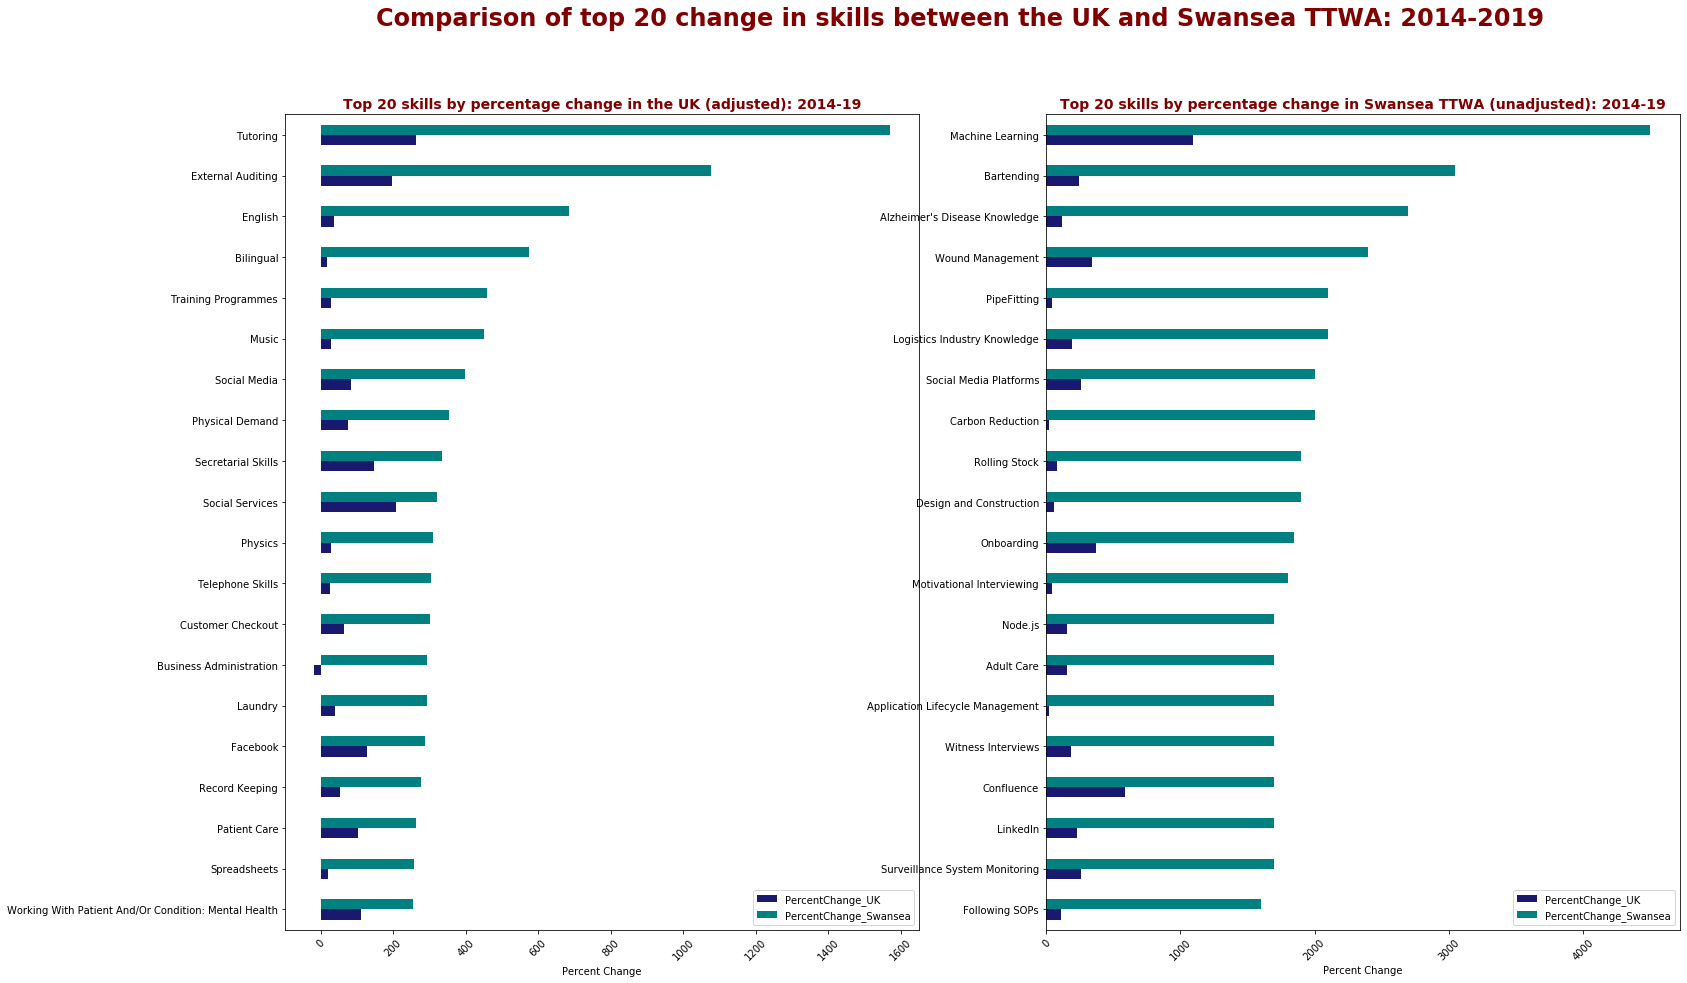

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
plt.suptitle('Comparison of top 20 change in skills between the UK and Swansea TTWA: 2014-2019', fontsize = 24, fontweight='bold', color='maroon')

buffer_df_adjusted.plot(kind='barh', color=['midnightblue', 'teal'], ax=ax1)
plt.setp(ax1.get_xticklabels(), rotation=45)
plt.setp(ax1.set_yticklabels(buffer_df_adjusted['skills']), rotation=0)
ax1.set_xlabel('Percent Change')
ax1.set_title('Top 20 skills by percentage change in the UK (adjusted): 2014-19', fontsize=14, fontweight='bold', color='maroon')

buffer_df_unadjusted.plot(kind='barh', color=['midnightblue', 'teal'], ax=ax2)
plt.setp(ax2.get_xticklabels(), rotation=45)
plt.setp(ax2.set_yticklabels(buffer_df_unadjusted['skills']), rotation=0)
ax2.set_xlabel('Percent Change')
ax2.set_title('Top 20 skills by percentage change in Swansea TTWA (unadjusted): 2014-19', fontsize=14, fontweight='bold', color='maroon')

plt.show()

### Comparison of Swansea TTWA with the UK

In [21]:
UK_skills_unadjusted = ['Apache Mesos', 'Coordination Improvement', 'Procedural Coding', 'Passenger Vans',  'Microsoft Power BI', 'Patient Information Verification', 'SEMRush', 
                        'NIST Cybersecurity Framework', 'Integration Platform as a Service', 'Docker Software', 'SAP S/4HANA', 'RxJava', 'Contractor Industry Knowledge', 'Spring Boot', 'Procore', 
                        'Bank Experience Enhancement', 'Deep Learning', 'Data Lakes / Reservoirs', 'Thrombectomy', 'Blockchain']

UK_skills_adjusted = ['Bitbucket', 'Ansible', 'Apache Spark', 'Data Engineering', 'OpenShift', 'Golang (Go Programming Language)','Electronic Health Records', 'TypeScript', 'Alteryx', 'Kibana', 
                      'Microsoft Power BI', 'SEMRush', 'NIST Cybersecurity Framework', 'Docker Software', 'Contractor Industry Knowledge', 'Spring Boot', 'Deep Learning', 'Data Lakes / Reservoirs', 
                      'Thrombectomy', 'Blockchain']

In [28]:
buffer_unadjusted = dict()

for skill in UK_skills_unadjusted:
    if skill in Swansea_TTWA_combined.index:
        update = {skill: Swansea_TTWA_combined.loc[skill]['PercentChange']}
        buffer_unadjusted.update(update)
        
buffer_df_unadjusted = pd.DataFrame.from_dict(buffer_unadjusted, orient='index')
display(buffer_df_unadjusted)

Empty DataFrame
Columns: []
Index: []

In [31]:
buffer_adjusted = dict()

for skill in UK_skills_adjusted:
    if skill in Swansea_TTWA_combined.index:
        update = {skill: (UK_combined.loc[skill]['PercentChange'], Swansea_TTWA_combined.loc[skill]['PercentChange'])}
        buffer_adjusted.update(update)
        
buffer_df_adjusted = pd.DataFrame.from_dict(buffer_adjusted, orient='index')
buffer_df_adjusted.columns = ['PercentChange_UK', 'PercentChange_Swansea']
buffer_df_adjusted

PercentChange_UK  PercentChange_Swansea
Ansible              1886.84               -30.7692
TypeScript           3102.94               475.0000
Kibana               3657.89               100.0000

Text(0.5, 1.0, 'Top 20 skills by percentage change in the UK (adjusted): 2014-19')

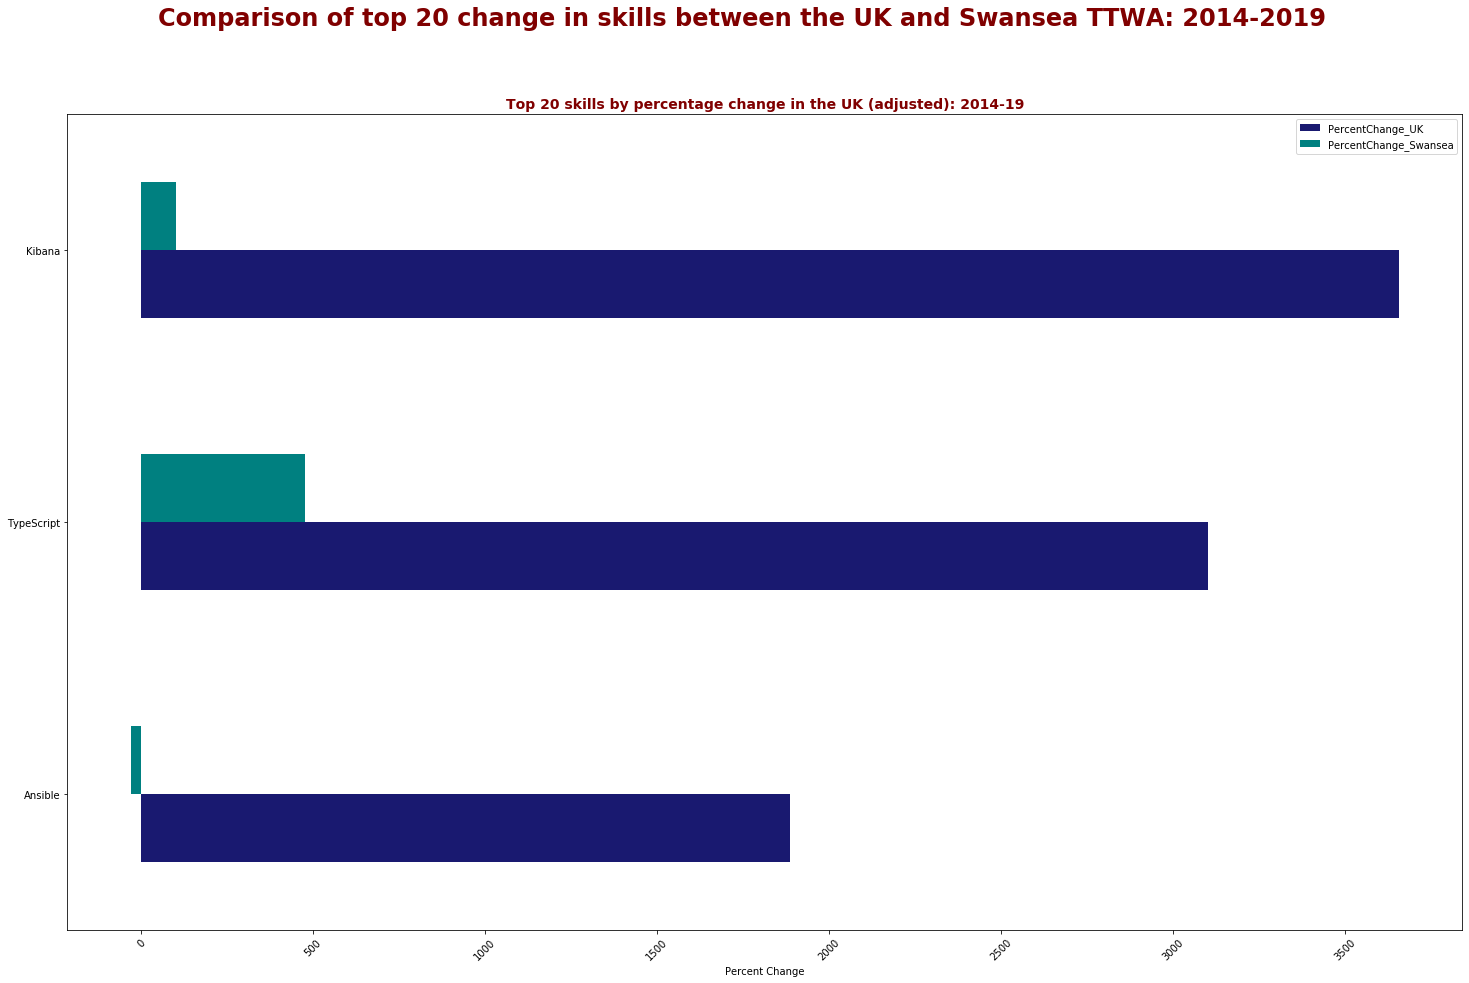

In [33]:
fig, ax = plt.subplots()
plt.suptitle('Comparison of top 20 change in skills between the UK and Swansea TTWA: 2014-2019', fontsize = 24, fontweight='bold', color='maroon')

buffer_df_adjusted.plot(kind='barh', color=['midnightblue', 'teal'], ax=ax)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.setp(ax.set_yticklabels(buffer_df_adjusted.index), rotation=0)
ax.set_xlabel('Percent Change')
ax.set_title('Top 20 skills by percentage change in the UK (adjusted): 2014-19', fontsize=14, fontweight='bold', color='maroon')